In [378]:
using CSV, Plots, Random, LinearAlgebra, Statistics, DataFrames, ARFIMA, GLM, RDatasets, XGBoost

┌ Info: Precompiling XGBoost [009559a3-9522-5dbb-924b-0b6ed2b22bb9]
└ @ Base loading.jl:1278


In [188]:
using SparseArrays
include("proxgrad.jl")

proxgrad_const

In [500]:
sentiment = CSV.read("sentiment4.csv")

,Total_Sentiment,Avg_Sentiment,Vaccine,Death,Shut,Spread,Date,Death_Count_Day
,Float64,Float64,Int64,Int64,Int64,Int64,String,Int64
1,1.1162,0.0858615,0,0,0,0,02/11/20,0
2,-1.3723,-0.0980214,2,3,1,1,02/12/20,0
3,-1.3975,-0.0931667,0,3,0,0,02/13/20,0
4,0.0919,0.00919,0,1,2,1,02/14/20,0
5,0.0,0.0,1,0,0,0,02/15/20,0
6,-1.3986,-0.1998,0,0,1,0,02/16/20,0
7,-1.5258,-0.190725,1,0,0,0,02/17/20,0
8,-0.5147,-0.0343133,0,2,0,1,02/18/20,0
9,-1.1541,-0.144262,0,0,0,1,02/19/20,0


In [501]:
sentiment = [sentiment[1:6] sentiment[8]]

,Total_Sentiment,Avg_Sentiment,Vaccine,Death,Shut,Spread,x1
,Float64,Float64,Int64,Int64,Int64,Int64,Int64
1,1.1162,0.0858615,0,0,0,0,0
2,-1.3723,-0.0980214,2,3,1,1,0
3,-1.3975,-0.0931667,0,3,0,0,0
4,0.0919,0.00919,0,1,2,1,0
5,0.0,0.0,1,0,0,0,0
6,-1.3986,-0.1998,0,0,1,0,0
7,-1.5258,-0.190725,1,0,0,0,0
8,-0.5147,-0.0343133,0,2,0,1,0
9,-1.1541,-0.144262,0,0,0,1,0


In [502]:
function standarize(stock)
    return (stock .- mean(stock))/sqrt(var(stock))
end

standarize (generic function with 1 method)

In [587]:
sentiment[1] = standarize(sentiment[1])
sentiment[2] = standarize(sentiment[2])
sentiment[3] = standarize(sentiment[3])
sentiment[4] = standarize(sentiment[4])
sentiment[5] = standarize(sentiment[5])
sentiment[6] = standarize(sentiment[6])
sentiment[7] = standarize(sentiment[7]);

In [521]:
function MA(stock)
    ma = stock[1:4]
    for i in 5:length(stock)
        ma = vcat(ma, mean(stock[i-4:i]))
    end
    return ma
end

MA (generic function with 1 method)

In [504]:
sentiment

,Total_Sentiment,Avg_Sentiment,Vaccine,Death,Shut,Spread,x1
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.577592,1.88905,-0.88069,-1.30332,-1.14515,-1.09711,-1.44969
2,0.266832,-0.689646,-0.384181,-0.69086,-0.826446,-0.709807,-1.44969
3,0.263685,-0.621565,-0.88069,-0.69086,-1.14515,-1.09711,-1.44969
4,0.449679,0.813839,-0.88069,-1.09917,-0.507743,-0.709807,-1.44969
5,0.438203,0.684963,-0.632435,-1.30332,-1.14515,-1.09711,-1.44969
6,0.263547,-2.11694,-0.88069,-1.30332,-0.826446,-1.09711,-1.44969
7,0.247663,-1.98968,-0.632435,-1.30332,-1.14515,-1.09711,-1.44969
8,0.373928,0.203768,-0.88069,-0.895014,-1.14515,-0.709807,-1.44969
9,0.29408,-1.33811,-0.88069,-1.30332,-1.14515,-0.709807,-1.44969


In [588]:
Anthem = CSV.read("Anthem.csv",header = false)
Cardinal = CSV.read("Cardinal.csv",header = false)
Cigna = CSV.read("Cigna.csv",header = false)
CVS = CSV.read("CVS.csv",header = false)
Gilead = CSV.read("Gilead.csv",header = false)
McKesson = CSV.read("McKesson.csv",header = false)
Moderna = CSV.read("Moderna.csv",header = false)
Pfizer = CSV.read("Pfizer.csv",header = false)
United = CSV.read("United.csv",header = false)
Johnson = CSV.read("Johnson.csv",header = false);

thread = 1 warning: only found 8 / 9 columns around data row: 263. Filling remaining columns with `missing`


In [589]:
mean1 = mean(Anthem[1])
std1 = sqrt(var(Anthem[1]))
Cardinal[1] = standarize(Cardinal[1])
Cigna[1] = standarize(Cigna[1])
CVS[1] = standarize(CVS[1])
Gilead[1] = standarize(Gilead[1])
McKesson[1] = standarize(McKesson[1])
Moderna[1] = standarize(Moderna[1])
Pfizer[1] = standarize(Pfizer[1])
United[1] = standarize(United[1])
Johnson[1] = standarize(Johnson[1])
Anthem[1] = standarize(Anthem[1]);

In [590]:
CardinalMa = MA(Cardinal[1])
CignaMa = MA(Cigna[1])
CVSMa = MA(CVS[1])
GileadMa = MA(Gilead[1])
McKessonMa = MA(McKesson[1])
ModernaMa =MA(Moderna[1])
PfizerMa = MA(Pfizer[1])
UnitedMa = MA(United[1])
JohnsonMa = MA(Johnson[1])
AnthemMa = MA(Anthem[1]);

In [595]:
function abs_err(y,pred)
    return mean(abs.(y-pred))/mean(y)
end

abs_err (generic function with 1 method)

In [596]:
function analysis(stock, sentiment)
    # index for 5-fold
    split = [43,43 + 44,43+ 44*2,43 + 44*3, 43 + 44*4,43 + 44*5]
    num_of_model = 3
    mse = zeros(num_of_model,5)
    w = zeros(18)
    for i in 1:5
        w_set = []
        # setting train and validation set
        split_cur = split[i]
        split2 = Int(round(split_cur*4/5))

        stock_train = stock[1][1:split2]
        stock_val = stock[1][split2 + 1:split_cur]

        sent_train = sentiment[1][1:split2]
        sent_val = sentiment[1][split2 + 1:split_cur]

        death_train = sentiment[3][1:split2]
        death_val = sentiment[3][split2 + 1:split_cur]

        vac_train = sentiment[2][1:split2]
        vac_val = sentiment[2][split2 + 1:split_cur]

        shut_train = sentiment[4][1:split2]
        shut_val = sentiment[4][split2 + 1:split_cur]

        #Naive Model, w[1:5]
        Xtrain = [sent_train death_train vac_train shut_train ones(length(sent_train))]
        Xval = [sent_val death_val vac_val shut_val ones(length(sent_val))]
        Ytrain = stock_train
        Yval = stock_val

        w_cur = Xtrain\Ytrain
        w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur
        mse[1,i] = abs_err(Yval,pred)

        #AR1 Model, w[6:11]
        Xtrain = [sent_train[2:end] stock_train[1:end-1] death_train[2:end] vac_train[2:end] shut_train[2:end] ones(length(sent_train)-1)]
        Xval = [sent_val[2:end] stock_val[1:end-1] death_val[2:end] vac_val[2:end] shut_val[2:end] ones(length(sent_val)-1)]
        Ytrain = stock_train[2:end]
        Yval = stock_val[2:end]

        w_cur = Xtrain\Ytrain
        w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur
        mse[2,i] = abs_err(Yval,pred)

        # AR2 Model, w[12:18]
        Xtrain = [sent_train[3:end] stock_train[2:end-1] stock_train[1:end-2] death_train[3:end] vac_train[3:end] shut_train[3:end] ones(length(sent_train)-2)]
        Xval = [sent_val[3:end] stock_val[2:end-1] stock_val[1:end-2] death_val[3:end] vac_val[3:end] shut_val[3:end] ones(length(sent_val)-2)]
        Ytrain = stock_train[3:end]
        Yval = stock_val[3:end]

        w_cur = Xtrain\Ytrain
        w_set = vcat(w_set, w_cur)
        pred = Xval*w_cur
        mse[3,i] = abs_err(Yval,pred)
        w = hcat(w,w_set)
    end
    w = w[:,2:6]
    
    avg_mse = mean(mse, dims=2)
    
    final_model = findmin(avg_mse)[2][1]
    test_mse = zeros(5)
    model = ["model 1", "model 2", "model 3"]
    model_length = [5, 6, 7]
    fig = plot(linestyle = :dot, title = "Test predictions from 9/17 to 10/30")
    w_test = zeros(model_length[final_model])
    for i in 1:5
        #Fixed index
        stock_train = stock[1][1:split[i]]
        sent_train = sentiment[1][1:split[i]]
        death_train = sentiment[3][1:split[i]]
        vac_train = sentiment[2][1:split[i]]
        shut_train = sentiment[4][1:split[i]]

        stock_test = stock[1][split[i]+1:split[i+1]]
        sent_test = sentiment[1][split[i]+1:split[i+1]]
        death_test = sentiment[3][split[i]+1:split[i+1]]
        vac_test = sentiment[2][split[i]+1:split[i+1]]
        shut_test = sentiment[4][split[i]+1:split[i+1]]

        if final_model == 1
            Xtrain = [sent_train death_train vac_train shut_train ones(length(sent_train))]
            Xtest = [sent_test death_test vac_test shut_test ones(length(sent_test))]
            Ytrain = stock_train
            Ytest = stock_test

            w_cur = Xtrain\Ytrain
            w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred)
            #plot
            if i == 5
                date = [1:44]
                plot!(date, Ytest, color = :red,  label = "Actual Stock Price")
                plot!(date, pred, color = :blue, label = "Naive Model")
            end

        elseif final_model == 2
            Xtrain = [sent_train[2:end] stock_train[1:end-1] death_train[2:end] vac_train[2:end] shut_train[2:end] ones(length(stock_train)-1)]
            Xtest = [sent_test[2:end] stock_test[1:end-1] death_test[2:end] vac_test[2:end] shut_test[2:end] ones(length(stock_test)-1)]
            Ytrain = stock_train[2:end]
            Ytest = stock_test[2:end]

            w_cur = Xtrain\Ytrain
            w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred)
            #plot
            if i == 5
                date = [2:44]
                plot!(date, Ytest, color = :red,  label = "Actual Stock Price")
                plot!(date, pred, color = :blue, label = "AR1 Model")
            end

        elseif final_model == 3
            Xtrain = [sent_train[3:end] stock_train[2:end-1] stock_train[1:end-2] death_train[3:end] vac_train[3:end] shut_train[3:end] ones(length(sent_train)-2)]
            Xtest = [sent_test[3:end] stock_test[2:end-1] stock_test[1:end-2] death_test[3:end] vac_test[3:end] shut_test[3:end] ones(length(stock_test)-2)]
            Ytrain = stock_train[3:end]
            Ytest = stock_test[3:end]

            w_cur = Xtrain\Ytrain
            w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred) 
            #plot
            if i == 5
                date = [3:44]
                plot!(date, Ytest, color = :red, label = "Actual Stock Price")
                plot!(date, pred, color = :blue, label = "AR2 Model")
            end
        else
            print("error")
        end  
    end
    w_test = w_test[:,2:6]
    display(fig)
    print("Selected: ", model[final_model], ", estimated error is: ",mean(test_mse), ", Validation Error is :", findmin(avg_mse)[1])
end

analysis (generic function with 1 method)

In [597]:
function analysis1(stock, sentiment, stockMa)
    # index for 5-fold
    split = [43,43 + 44,43+ 44*2,43 + 44*3, 43 + 44*4,43 + 44*5]
    num_of_model = 2
    mse = zeros(num_of_model*9,5)
    w = zeros(162)
    for i in 1:5
        w_set = []
        position = 1
        # setting train and validation set
        split_cur = split[i]
        split2 = Int(round(split_cur*4/5))

        stock_train = stock[1][1:split2]
        stock_val = stock[1][split2 + 1:split_cur]
        
        stockMa_train = stockMa[1:split2]
        stockMa_val = stockMa[split2 + 1:split_cur]

        sent_train = sentiment[1][1:split2]
        sent_val = sentiment[1][split2 + 1:split_cur]

        death_train = sentiment[3][1:split2]
        death_val = sentiment[3][split2 + 1:split_cur]

        vac_train = sentiment[2][1:split2]
        vac_val = sentiment[2][split2 + 1:split_cur]

        shut_train = sentiment[4][1:split2]
        shut_val = sentiment[4][split2 + 1:split_cur]
        
        spred_train = sentiment[5][1:split2]
        spred_val = sentiment[5][split2 + 1:split_cur]
        
        death_train = sentiment[6][1:split2]
        death_val = sentiment[6][split2 + 1:split_cur]
        
        pos_train = sentiment[7][1:split2]
        pos_val = sentiment[7][split2 + 1:split_cur]

        #Naive Model, w[1:9]*9
        Xtrain = [sent_train[2:end] stockMa_train[1:end-1] death_train[2:end] vac_train[2:end] shut_train[2:end] spred_train[2:end] death_train[2:end] pos_train[2:end] ones(length(sent_train)-1)]
        Xval = [sent_val[2:end] stockMa_val[1:end-1] death_val[2:end] vac_val[2:end] shut_val[2:end] spred_val[2:end] death_val[2:end] pos_val[2:end] ones(length(sent_val)-1)]
        Ytrain = stock_train[2:end]
        Yval = stock_val[2:end]
        for j in [0.1:0.1:0.9;]
            n = length(Ytrain)
            loss = 1/n*QuadLoss()

            # we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
            λ = j
            reg = λ*QuadReg()

            w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)
            w_set = vcat(w_set, w_cur)
            pred = Xval*w_cur

            mse[position,i] = abs_err(Yval,pred)
            position = position + 1
        end

        for j in [0.1:0.1:0.9;]
            n = length(Ytrain)
            loss = 1/n*QuadLoss()

            # we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
            λ = j
            reg = λ*OneReg()

            w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)
            w_set = vcat(w_set, w_cur)
            pred = Xval*w_cur

            mse[position,i] = abs_err(Yval,pred)
            position = position + 1
        end
        w = hcat(w, w_set)
    end
    return w,mse
end

analysis1 (generic function with 2 methods)

In [598]:
function analysis2(stock, sentiment, w, mse, stockMa)
    avg_mse = mean(mse, dims=2)
    
    final_model = findmin(avg_mse)[2][1]
    test_mse = zeros(5)
    fig = plot(linestyle = :dot, title = "Test predictions from 9/17 to 10/30")
    w_test = zeros(9)
        
    for i in 1:5
        #Fixed index
        stock_train = stock[1][1:split[i]]
        stockMa_train = stockMa[1:split[i]]
        sent_train = sentiment[1][1:split[i]]
        death_train = sentiment[3][1:split[i]]
        vac_train = sentiment[2][1:split[i]]
        shut_train = sentiment[4][1:split[i]]
        spred_train = sentiment[5][1:split[i]]
        death_train = sentiment[6][1:split[i]]
        pos_train = sentiment[7][1:split[i]]
        

        stock_test = stock[1][split[i]+1:split[i+1]]
        stockMa_test = stockMa[split[i]+1:split[i+1]]
        sent_test = sentiment[1][split[i]+1:split[i+1]]
        death_test = sentiment[3][split[i]+1:split[i+1]]
        vac_test = sentiment[2][split[i]+1:split[i+1]]
        shut_test = sentiment[4][split[i]+1:split[i+1]]
        spred_test = sentiment[5][split[i]+1:split[i+1]]
        death_test = sentiment[6][split[i]+1:split[i+1]]
        pos_test = sentiment[7][split[i]+1:split[i+1]]

        if final_model ÷ 2 == 1
            Xtrain = [sent_train[2:end] stockMa_train[1:end-1] death_train[2:end] vac_train[2:end] shut_train[2:end] spred_train[2:end] death_train[2:end] pos_train[2:end] ones(length(stock_train)-1)]
            Xtest = [sent_test[2:end] stockMa_test[1:end-1] death_test[2:end] vac_test[2:end] shut_test[2:end] spred_test[2:end] death_test[2:end] pos_test[2:end] ones(length(stock_test)-1)]
            Ytrain = stock_train[2:end]
            Ytest = stock_test[2:end]

            n = length(Ytrain)
            loss = 1/n*QuadLoss()

            # we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
            λ = final_model%9
            reg = λ*QuadReg()

            w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)
            w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred)
            
            if i == 5
                date = [2:44]
                plot!(date, Ytest, color = :red,  label = "Actual Stock Price")
                plot!(date, pred, color = :blue, label = "AR1 Model")
            end

        else
            Xtrain = [sent_train[2:end] stockMa_train[1:end-1] death_train[2:end] vac_train[2:end] shut_train[2:end] spred_train[2:end] death_train[2:end] pos_train[2:end] ones(length(stock_train)-1)]
            Xtest = [sent_test[2:end] stockMa_test[1:end-1] death_test[2:end] vac_test[2:end] shut_test[2:end] spred_test[2:end] death_test[2:end] pos_test[2:end] ones(length(stock_test)-1)]
            Ytrain = stock_train[2:end]
            Ytest = stock_test[2:end]

            n = length(Ytrain)
            loss = 1/n*QuadLoss()

            # we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
            λ = final_model%9
            reg = λ*OneReg()

            w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)
            w_test = hcat(w_test, w_cur)
            pred = Xtest*w_cur
            test_mse[i] = abs_err(Ytest,pred)
            
            if i == 5
                date = [2:44]
                plot!(date, Ytest, color = :red,  label = "Actual Stock Price")
                plot!(date, pred, color = :blue, label = "AR1 Model")
            end
        end
    end
    w_test = w_test[:,2:6]
    display(fig)
    print("Selected: ", final_model, ", estimated error is: ",mean(test_mse), ", Validation Error is :", findmin(avg_mse)[1])
    return w_test
end

analysis2 (generic function with 2 methods)

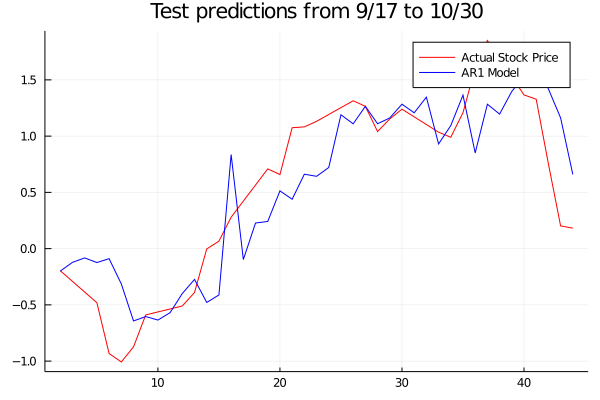

Selected: 18, estimated error is: 0.02505956352415579, Validation Error is :0.7243784245000567

9×5 Array{Float64,2}:
 -0.0140336   0.211086   0.148271    0.165866     0.163395
  0.942591    0.764077   0.82629     0.859943     0.895711
 -0.165424   -0.132995  -0.0954349  -0.0754306   -0.0524336
 -0.172677   -0.235007  -0.199723   -0.168715    -0.130255
  0.0454721   0.080289   0.117311    0.142454     0.142097
  0.0048291   0.029075   0.0065854  -0.00544608   0.00483976
 -0.165424   -0.132995  -0.0954349  -0.0754306   -0.0524336
  0.143652    0.472592   0.155309    0.0953562    0.0697799
 -0.0980613   0.475861   0.0638242   0.00616369  -0.00711519

In [599]:
w,mse = analysis1(Anthem, sentiment, AnthemMa)
analysis2(Anthem, sentiment, w, mse, AnthemMa)

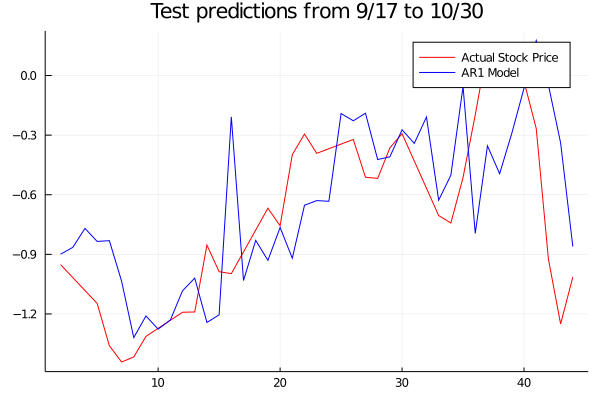

Selected: 9, estimated error is: -4.935100660381466, Validation Error is :-0.39197917000213145

9×5 Array{Float64,2}:
 -0.118109    0.154795     0.152736     0.159653      0.146606
  0.941803    0.891131     0.866789     0.908396      0.933034
 -0.104246   -0.082654    -0.0643815   -0.0526659    -0.0341124
 -0.185861   -0.241283    -0.221395    -0.174458     -0.12611
  0.14862     0.207795     0.186812     0.198673      0.191952
 -0.104553    0.0336322   -0.00611599   0.000916105   0.00525921
 -0.104246   -0.082654    -0.0643815   -0.0526659    -0.0341124
  0.148369   -0.00878073   0.147955     0.0578983     0.0526661
 -0.0840533  -0.139995     0.0895467   -0.0181277    -0.027108

In [600]:
w,mse = analysis1(Cigna, sentiment,CignaMa)
analysis2(Cigna, sentiment, w, mse, CignaMa)

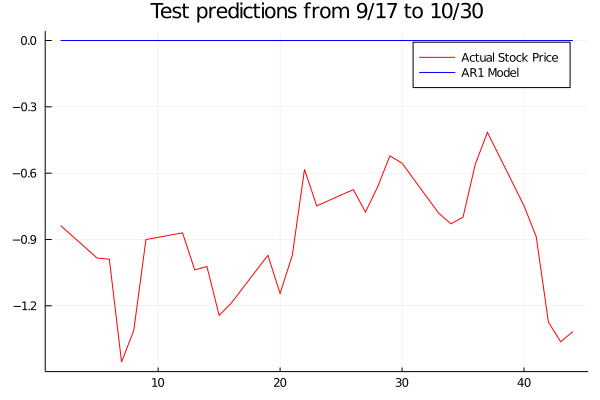

Selected: 6, estimated error is: -1.6449887916932038, Validation Error is :-1.9101252315595674

9×5 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [601]:
w,mse = analysis1(Cardinal, sentiment,CardinalMa)
analysis2(Cardinal, sentiment, w, mse, CardinalMa)

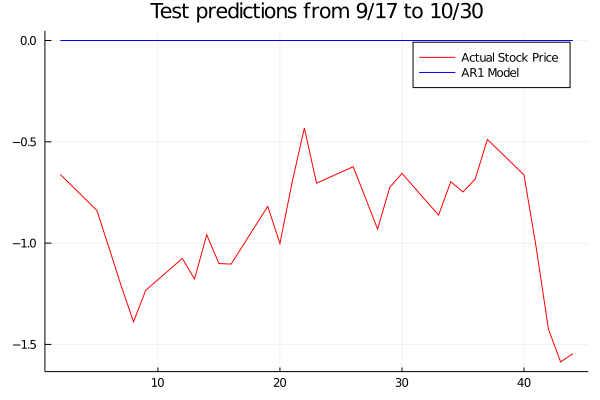

Selected: 11, estimated error is: 3.3176191079549207, Validation Error is :1.0828111506839468

9×5 Array{Float64,2}:
 0.0       0.0       0.0      0.0  0.0
 0.546669  0.312948  0.17578  0.0  0.0
 0.0       0.0       0.0      0.0  0.0
 0.0       0.0       0.0      0.0  0.0
 0.0       0.0       0.0      0.0  0.0
 0.0       0.0       0.0      0.0  0.0
 0.0       0.0       0.0      0.0  0.0
 0.0       0.0       0.0      0.0  0.0
 0.0       0.0       0.0      0.0  0.0

In [602]:
w,mse = analysis1(CVS, sentiment,CVSMa)
analysis2(CVS, sentiment, w, mse, CVSMa)

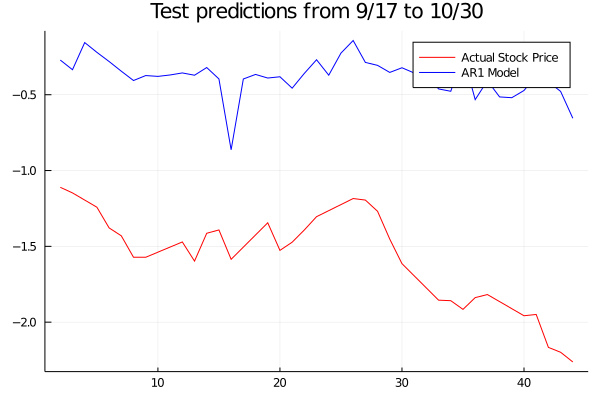

Selected: 2, estimated error is: 0.11865666181149229, Validation Error is :0.25343124206471324

9×5 Array{Float64,2}:
 -0.0368892  -0.0713646  -0.0566026  -0.0355357  -0.0334547
  0.077637    0.176337    0.174928    0.176315    0.196494
  0.0363183   0.0243009   0.020924    0.0167819   0.0159723
 -0.0317606  -0.043026   -0.0377496  -0.0152295  -0.0197797
  0.0451814   0.0839849   0.0712412   0.0552072   0.0628116
 -0.0085662   0.0440803   0.0278615   0.0224396   0.0287638
  0.0363183   0.0243009   0.020924    0.0167819   0.0159723
 -0.0208584  -0.0525455  -0.0416131  -0.0266112  -0.0747006
  0.0144207   0.0886689   0.129309    0.150476    0.0736478

In [603]:
w,mse = analysis1(Gilead, sentiment,GileadMa)
analysis2(Gilead, sentiment, w, mse, GileadMa)

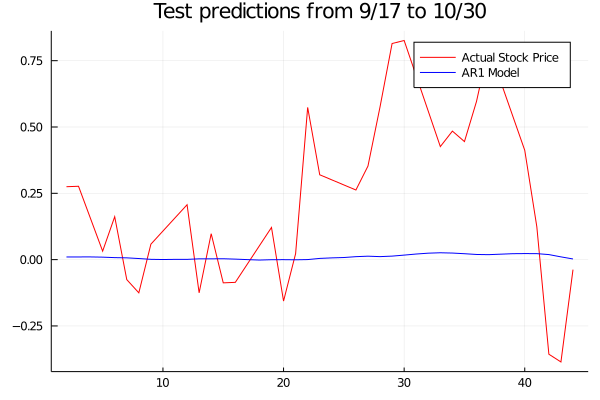

Selected: 11, estimated error is: 0.9101451089549707, Validation Error is :0.18115366757216328

9×5 Array{Float64,2}:
 0.0       0.0       0.0       0.0       0.0
 0.568384  0.477675  0.344342  0.182826  0.037282
 0.0       0.0       0.0       0.0       0.0
 0.0       0.0       0.0       0.0       0.0
 0.0       0.0       0.0       0.0       0.0
 0.0       0.0       0.0       0.0       0.0
 0.0       0.0       0.0       0.0       0.0
 0.0       0.0       0.0       0.0       0.0
 0.0       0.0       0.0       0.0       0.0

In [604]:
w,mse = analysis1(McKesson, sentiment,McKessonMa)
analysis2(McKesson, sentiment, w, mse, McKessonMa)

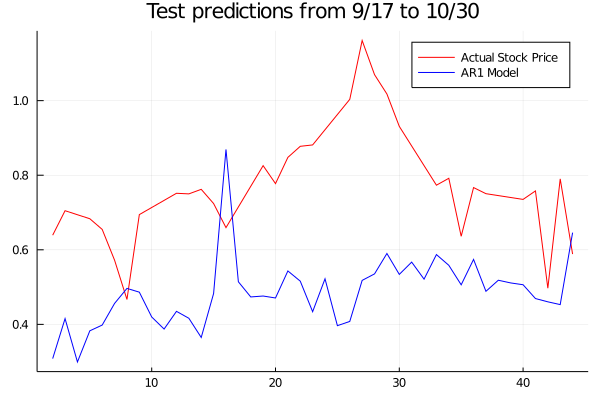

Selected: 2, estimated error is: 0.49457093026803084, Validation Error is :0.12681380774922696

9×5 Array{Float64,2}:
 -0.0101881    0.0057821    0.0139244   0.0163722   0.018801
  0.354304     0.309406     0.310774    0.303316    0.277724
 -0.0143931   -0.0158091   -0.0161574  -0.0128777  -0.00990771
  0.0488412    0.044452     0.0384682   0.0380876   0.0383218
  0.0949152    0.0237496    0.0176818   0.0102077   0.00458704
  0.00602795  -0.00466405  -0.0146031  -0.0309184  -0.0308178
 -0.0143931   -0.0158091   -0.0161574  -0.0128777  -0.00990771
  0.291145     0.255636     0.225352    0.203699    0.193929
 -0.201014    -0.173571    -0.0979989  -0.0281694  -0.0132666

In [605]:
w,mse = analysis1(Moderna, sentiment,ModernaMa)
analysis2(Moderna, sentiment, w, mse, ModernaMa)

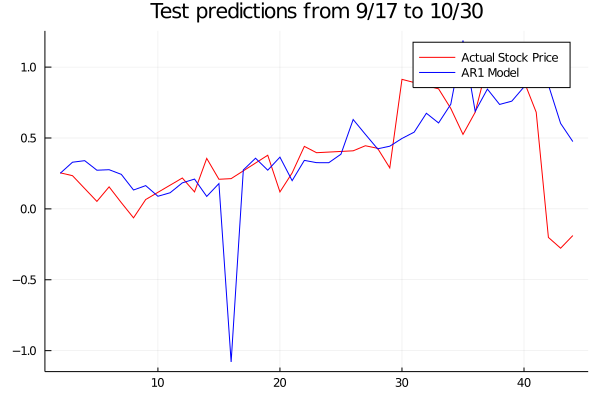

Selected: 18, estimated error is: -0.6938522435099912, Validation Error is :0.1630543656652136

9×5 Array{Float64,2}:
 -0.819881    -0.121695   -0.142587    -0.13095     -0.143675
  0.958342     0.872073    0.969809     0.938305     0.93668
 -0.029867    -0.0319079  -0.02057     -0.00870997  -0.00920253
  0.00408698  -0.122518   -0.0221201    0.0325702    0.0449596
 -0.253101     0.0770747   0.112395     0.106731     0.0976797
 -0.140885    -0.0248816  -0.00705228  -0.0307751   -0.0298858
 -0.029867    -0.0319079  -0.02057     -0.00870997  -0.00920253
  0.189006     0.327986   -0.0105039    0.118903     0.0883121
 -0.132153     0.233369   -0.131093     0.0231987   -0.00217658

In [606]:
w,mse = analysis1(Pfizer, sentiment,PfizerMa)
analysis2(Pfizer, sentiment, w, mse, PfizerMa)

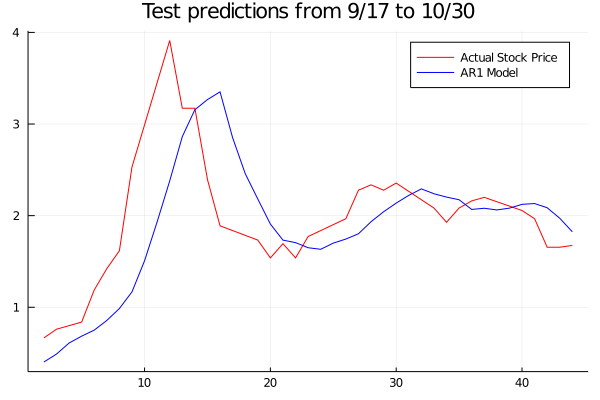

Selected: 18, estimated error is: -0.2094818347404288, Validation Error is :-1.0084545300263905

9×5 Array{Float64,2}:
  0.0689281    0.070679    0.0543681   0.0486627    0.0281208
  0.631811     0.78231     0.803572    0.842243     0.968655
 -0.0656172   -0.0189992  -0.0125378  -0.00394955  -0.00152606
 -0.0274748   -0.0447232  -0.0441497  -0.0310471   -0.0193475
  0.0820665    0.0299178   0.0231803   0.0237813    0.0159977
 -0.0557708   -0.0124819  -0.011632   -0.0173248    0.00606483
 -0.0656172   -0.0189992  -0.0125378  -0.00394955  -0.00152606
  0.00303914  -0.0499374  -0.067459   -0.0360227    0.0397516
  0.0258021   -0.0970684  -0.126354   -0.089135    -0.00626257

In [607]:
w,mse = analysis1(United, sentiment,UnitedMa)
analysis2(United, sentiment, w, mse, UnitedMa)

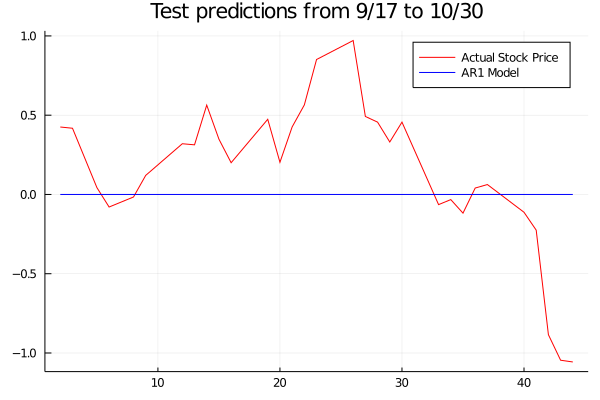

Selected: 15, estimated error is: -4.3360448110643235, Validation Error is :0.7086813009837771

9×5 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [608]:
w,mse = analysis1(Johnson, sentiment,JohnsonMa)
analysis2(Johnson, sentiment, w, mse, JohnsonMa)

In [555]:

function findlambda(stock, fig, split, label1)
    i=5
    stock_train = stock[1][1:split[i]]
    sent_train = sentiment[1][1:split[i]]
    death_train = sentiment[3][1:split[i]]
    vac_train = sentiment[2][1:split[i]]
    shut_train = sentiment[4][1:split[i]]
    spred_train = sentiment[5][1:split[i]]
    death_train = sentiment[6][1:split[i]]
    pos_train = sentiment[7][1:split[i]]
    MA_Anthem_train = MA_Anthem[1:split[i]-4]

    stock_test = stock[1][split[i]+1:split[i+1]]
    sent_test = sentiment[1][split[i]+1:split[i+1]]
    death_test = sentiment[3][split[i]+1:split[i+1]]
    vac_test = sentiment[2][split[i]+1:split[i+1]]
    shut_test = sentiment[4][split[i]+1:split[i+1]]
    spred_test = sentiment[5][split[i]+1:split[i+1]]
    death_test = sentiment[6][split[i]+1:split[i+1]]
    pos_test = sentiment[7][split[i]+1:split[i+1]]
    MA_Anthem_test = MA_Anthem[split[i]-4:split[i+1]-4]

    Xtrain = [sent_train[5:end] MA_Anthem_train death_train[5:end] vac_train[5:end] shut_train[5:end] spred_train[5:end] death_train[5:end] pos_train[5:end] ones(length(sent_train[5:end]))]
    Xtest = [sent_test[5:end] MA_Anthem_test[6:end] death_test[5:end] vac_test[5:end] shut_test[5:end] spred_test[5:end] death_test[5:end] pos_test[5:end] ones(length(sent_test[5:end]))]
    Ytrain = stock_train[5:end]
    Ytest = stock_test[5:end]
    #ridge regression
    abs_er = []
    for i in [0.1:0.1:0.9;]
        n = length(Ytrain)
        loss = 1/n*QuadLoss()

        # we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
        λ = i
        reg = λ*QuadReg()

        w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)

        pred = Xtest*w_cur

        date = [5:44]
        #Ytest = Ytest.*std1 .+ mean1
        #pred = pred.*std1 .+ mean1
        #plot(date, Ytest, color = :red,  label = "Actual Stock Price")
        #plot!(date, pred, color = :blue, label = "AR1 Model")
        abs_er = vcat(abs_er, abs_err(Ytest,pred))
    end
    plot!([0.1:0.1:0.9;], abs_er, label = label1)
end

findlambda (generic function with 2 methods)

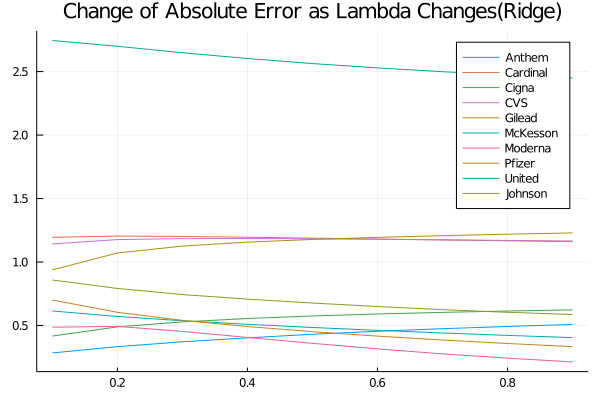

In [449]:
fig = plot(linestyle = :dot, title = "Change of Absolute Error as Lambda Changes(Ridge)")
findlambda(Anthem, fig, split, "Anthem")
findlambda(Cardinal, fig, split, "Cardinal")
findlambda(Cigna, fig, split, "Cigna")
findlambda(CVS, fig, split, "CVS")
findlambda(Gilead, fig, split, "Gilead")
findlambda(McKesson, fig, split, "McKesson")
findlambda(Moderna, fig, split, "Moderna")
findlambda(Pfizer, fig, split, "Pfizer")
findlambda(United, fig, split, "United")
findlambda(Johnson, fig, split, "Johnson")

In [443]:
function findlambda1(stock, fig, split, label1)
    i=5
    stock_train = stock[1][1:split[i]]
    sent_train = sentiment[1][1:split[i]]
    death_train = sentiment[3][1:split[i]]
    vac_train = sentiment[2][1:split[i]]
    shut_train = sentiment[4][1:split[i]]
    spred_train = sentiment[5][1:split[i]]
    death_train = sentiment[6][1:split[i]]
    pos_train = sentiment[7][1:split[i]]
    MA_Anthem_train = MA_Anthem[1:split[i]-4]

    stock_test = stock[1][split[i]+1:split[i+1]]
    sent_test = sentiment[1][split[i]+1:split[i+1]]
    death_test = sentiment[3][split[i]+1:split[i+1]]
    vac_test = sentiment[2][split[i]+1:split[i+1]]
    shut_test = sentiment[4][split[i]+1:split[i+1]]
    spred_test = sentiment[5][split[i]+1:split[i+1]]
    death_test = sentiment[6][split[i]+1:split[i+1]]
    pos_test = sentiment[7][split[i]+1:split[i+1]]
    MA_Anthem_test = MA_Anthem[split[i]-4:split[i+1]-4]

    Xtrain = [sent_train[5:end] MA_Anthem_train death_train[5:end] vac_train[5:end] shut_train[5:end] spred_train[5:end] death_train[5:end] pos_train[5:end] ones(length(sent_train[5:end]))]
    Xtest = [sent_test[5:end] MA_Anthem_test[6:end] death_test[5:end] vac_test[5:end] shut_test[5:end] spred_test[5:end] death_test[5:end] pos_test[5:end] ones(length(sent_test[5:end]))]
    Ytrain = stock_train[5:end]
    Ytest = stock_test[5:end]
    #ridge regression
    abs_er = []
    for i in [0.1:0.1:0.9;]
        n = length(Ytrain)
        loss = 1/n*QuadLoss()

        # we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
        λ = i
        reg = λ*OneReg()

        w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)

        pred = Xtest*w_cur

        date = [5:44]
        #Ytest = Ytest.*std1 .+ mean1
        #pred = pred.*std1 .+ mean1
        #plot(date, Ytest, color = :red,  label = "Actual Stock Price")
        #plot!(date, pred, color = :blue, label = "AR1 Model")
        abs_er = vcat(abs_er, abs_err(Ytest,pred))
    end
    plot!([0.1:0.1:0.9;], abs_er, label = label1)
end

findlambda1 (generic function with 1 method)

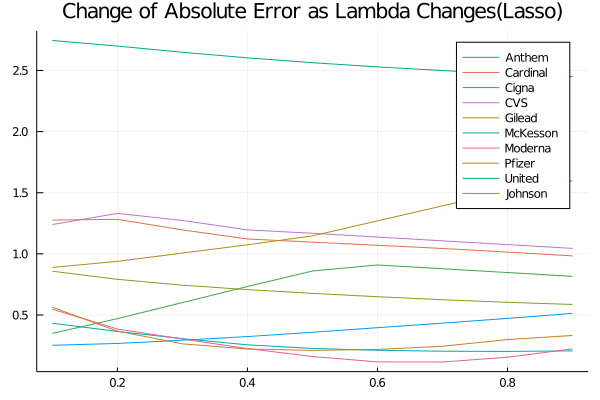

In [448]:
fig = plot(linestyle = :dot, title = "Change of Absolute Error as Lambda Changes(Lasso)", xlable = "lambda")
findlambda1(Anthem, fig, split, "Anthem")
findlambda1(Cardinal, fig, split, "Cardinal")
findlambda1(Cigna, fig, split, "Cigna")
findlambda1(CVS, fig, split, "CVS")
findlambda1(Gilead, fig, split, "Gilead")
findlambda1(McKesson, fig, split, "McKesson")
findlambda1(Moderna, fig, split, "Moderna")
findlambda1(Pfizer, fig, split, "Pfizer")
findlambda(United, fig, split, "United")
findlambda(Johnson, fig, split, "Johnson")

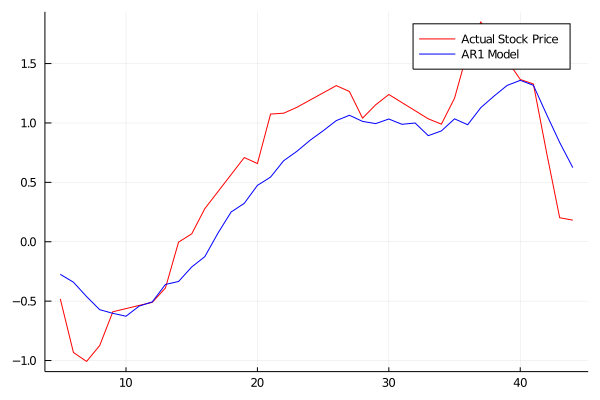

In [371]:
n = length(Ytrain)
loss = 1/n*L1Loss()

# we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
λ = .1
reg = λ*QuadReg()

w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)

pred = Xtest*w_cur

date = [5:44]
plot(date, Ytest, color = :red,  label = "Actual Stock Price")
plot!(date, pred, color = :blue, label = "AR1 Model")

In [372]:
abs_err(Ytest,pred)

0.2735761603609115

In [373]:
w_cur

9-element Array{Float64,1}:
 -0.008246609790010975
  0.8299920243830822
  0.04783977560891382
  0.026878700953591034
 -0.023659705061629094
 -0.0046105912053112244
  0.04783977560891382
 -0.07792583843401349
  0.0071378931067320826

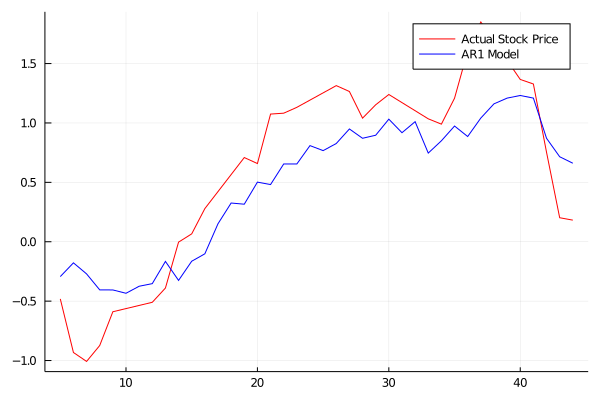

In [374]:
n = length(Ytrain)
loss = 1/n* QuantileLoss(0.3)

# we form λ|| ⋅ ||^2 by multiplying the QuadReg() function by λ
λ = .1
reg = λ*QuadReg()

w_cur = proxgrad(loss, reg, Xtrain, Ytrain, maxiters=1000)

pred = Xtest*w_cur

date = [5:44]
plot(date, Ytest, color = :red,  label = "Actual Stock Price")
plot!(date, pred, color = :blue, label = "AR1 Model")

In [375]:
w_cur

9-element Array{Float64,1}:
 -0.014278038267077634
  0.7082217314328102
  0.04404951263540134
  0.014488046991052278
 -0.08554307589235105
 -0.02504520787110289
  0.04404951263540134
 -0.04474006910784708
  0.004028608348961928

In [398]:
num_round = 20
bst = xgboost(Xtrain, num_round, label = Ytrain, eta = 1, max_depth = 10000)

[1]	train-rmse:0.308848
[2]	train-rmse:0.121316
[3]	train-rmse:0.047712
[4]	train-rmse:0.023118
[5]	train-rmse:0.010953
[6]	train-rmse:0.005000
[7]	train-rmse:0.002438
[8]	train-rmse:0.001203
[9]	train-rmse:0.000738
[10]	train-rmse:0.000613
[11]	train-rmse:0.000605
[12]	train-rmse:0.000605
[13]	train-rmse:0.000605
[14]	train-rmse:0.000605
[15]	train-rmse:0.000605
[16]	train-rmse:0.000605
[17]	train-rmse:0.000605
[18]	train-rmse:0.000605
[19]	train-rmse:0.000605
[20]	train-rmse:0.000605


Booster(Ptr{Nothing} @0x00007f8c739e0200)

In [399]:
pred = XGBoost.predict(bst, Xtest);

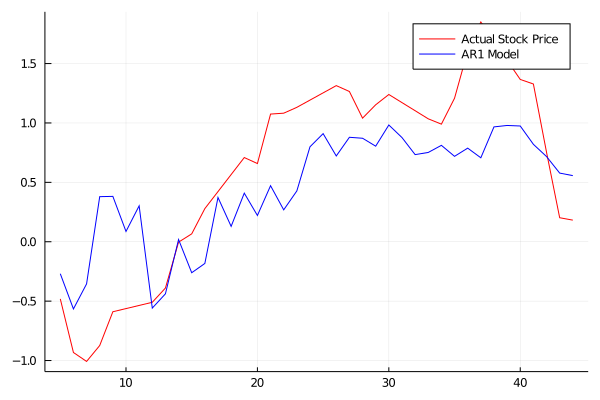

In [400]:
plot(date, Ytest, color = :red,  label = "Actual Stock Price")
plot!(date, pred, color = :blue, label = "AR1 Model")

In [394]:
abs_err(Ytest,pred)

0.4690376173216495

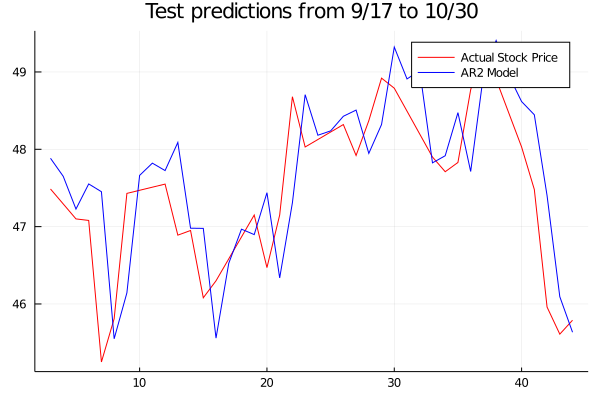

Selected: model 3, estimated error is: 0.9105555305797374, Validation Error is :0.9886927499833214

In [171]:
analysis(Cardinal, sentiment)

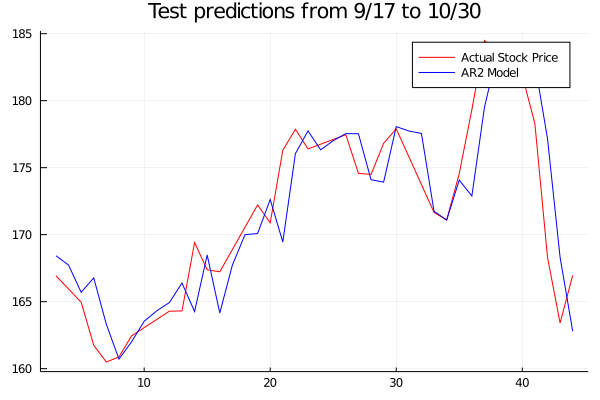

Selected: model 3, estimated error is: 3.231777300711547, Validation Error is :4.3809369630816475

In [172]:
analysis(Cigna, sentiment)

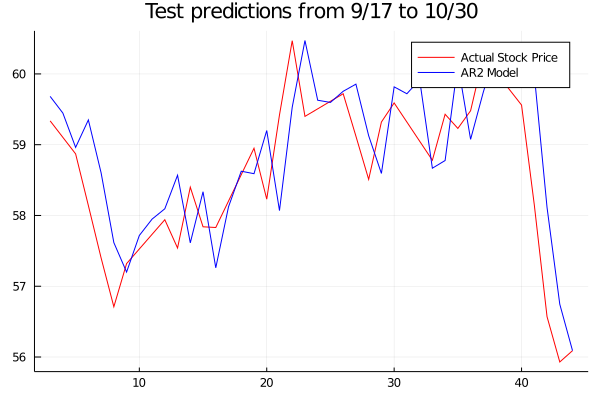

Selected: model 3, estimated error is: 0.9442286344862815, Validation Error is :1.0686221629300268

In [173]:
analysis(CVS, sentiment)

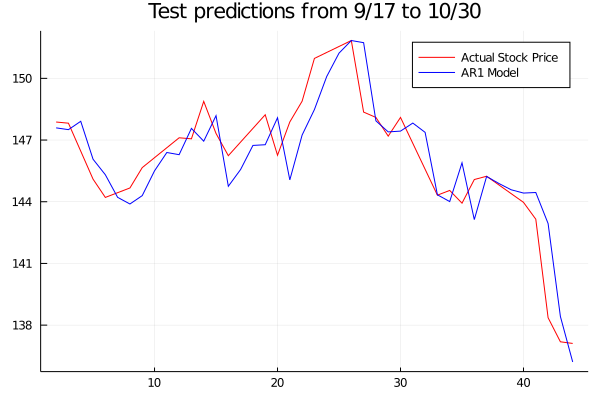

Selected: model 2, estimated error is: 2.010509678994439, Validation Error is :2.3448974211882216

In [174]:
analysis(Johnson, sentiment)

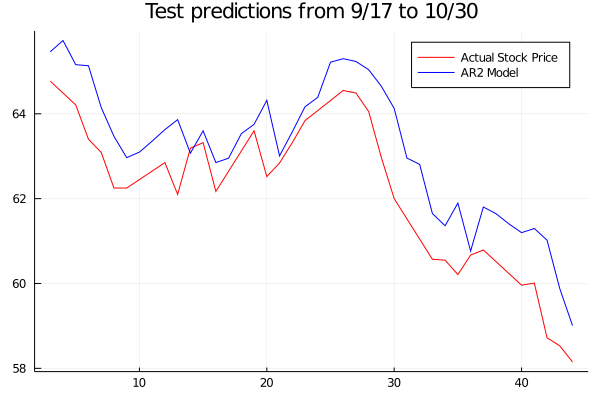

Selected: model 3, estimated error is: 1.2500094892400604, Validation Error is :1.519994378699058

In [175]:
analysis(Gilead, sentiment)

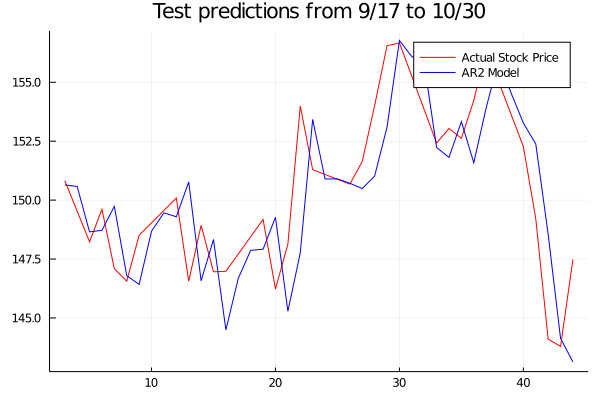

Selected: model 3, estimated error is: 2.3983681601998135, Validation Error is :2.575233624475387

In [176]:
analysis(McKesson, sentiment)

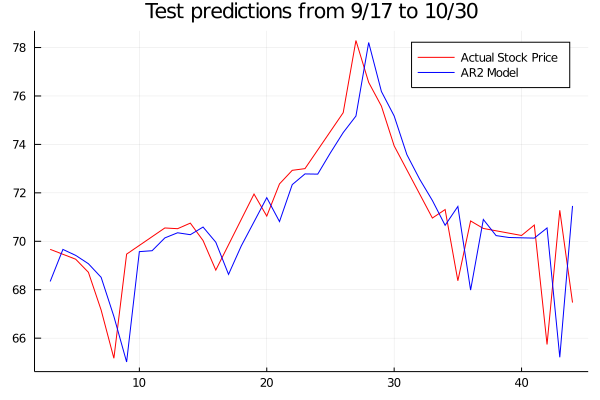

Selected: model 3, estimated error is: 2.1443571093345257, Validation Error is :1.9056537154654856

In [177]:
analysis(Moderna, sentiment)

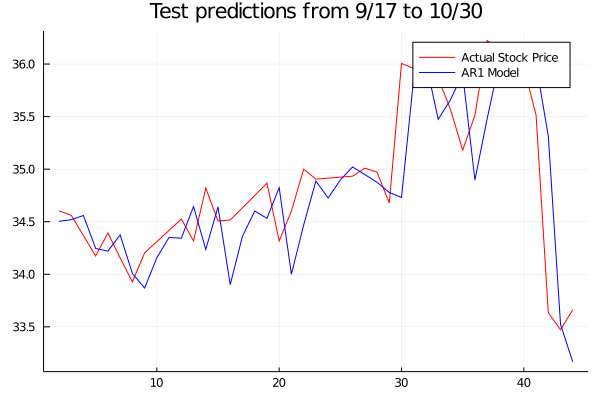

Selected: model 2, estimated error is: 0.6229715846638244, Validation Error is :0.6462306311097439

In [178]:
analysis(Pfizer, sentiment)

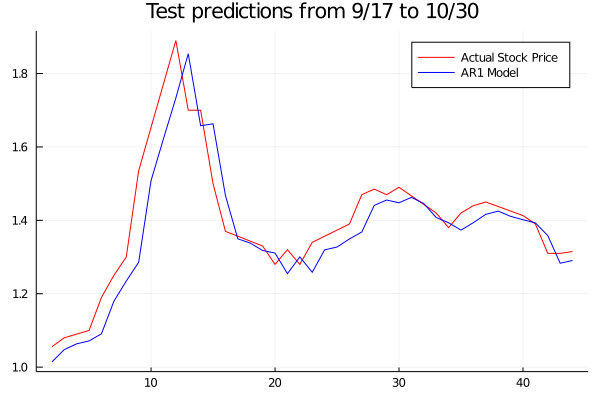

Selected: model 2, estimated error is: 0.029183860910923655, Validation Error is :0.02860916423932695

In [179]:
analysis(United, sentiment)